In [1]:
import pandas as pd
import math
import statsmodels
from matplotlib import pyplot as plt
import numpy as np
import scipy
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

In [2]:
raw_data = pd.read_csv('E:/projects/housing_price/data/train.csv',index_col=0)

In [3]:
raw_test = pd.read_csv('E:/projects/housing_price/data/test.csv',index_col=0)

In [4]:
house_price = raw_data['SalePrice']

In [5]:
raw_data = raw_data.drop(columns = "SalePrice")

In [6]:
data = pd.concat([raw_data,raw_test])

#### First Look at the shape of the data

In [7]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("There are {} samples and {} variables".format(sample_num, variable_num))

There are 2919 samples and 79 variables


In [8]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


# Variable Trimming and Data Matrix Reshaping

#### Next we would want start to trim down variables that have too many missing values or not significantly different across all samples. Here is a function that would help us investigate a variable's value distribution.

In [9]:
def investigate_var(data,var):
    sample_num = data.shape[0]
    types = set(data[var])
    for type in types:
        if not isinstance(type,str):
            missing_count = 0
            for i in range(1,sample_num+1):
                if not isinstance(data.loc[i][var],str):
                    missing_count += 1
            print("There are {} sample(s) with missing {} type, being {}%. ".format(missing_count,var,(missing_count/sample_num)*100))
        else:
            count = data[data[var]==type].shape[0]
            print("There are {} sample(s) with {} type {}, being {}%. ".format(count,var,type,(count/sample_num)*100))

## MSSubClass

#### This is a summarization of other variables, we don't need it. 

In [10]:
data = data.drop(columns=['MSSubClass'])

## Alley

In [11]:
var = 'Alley'
investigate_var(data,var)

There are 2721 sample(s) with missing Alley type, being 93.21685508735868%. 
There are 78 sample(s) with Alley type Pave, being 2.672147995889003%. 
There are 120 sample(s) with Alley type Grvl, being 4.110996916752312%. 


#### Since there is only a small portion of houses having data for "Alley", we will remove this variable.

In [12]:
data = data.drop(columns=[var])

#### Make sure that Alley is removed from the variable list

In [13]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After removing '{}', there are {} samples and {} variables".format(var,sample_num, variable_num))

After removing 'Alley', there are 2919 samples and 77 variables


## Street

In [14]:
var = 'Street'
investigate_var(data,var)

There are 2907 sample(s) with Street type Pave, being 99.58890030832477%. 
There are 12 sample(s) with Street type Grvl, being 0.41109969167523125%. 


#### Since only 0.4% of the houses have Grvl as their 'Street' typing, we will remove it as well.

In [15]:
data = data.drop(columns=[var])

In [16]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After removing '{}', there are {} samples and {} variables".format(var,sample_num, variable_num))

After removing 'Street', there are 2919 samples and 76 variables


## Utilities

In [17]:
var = 'Utilities'
investigate_var(data,var)

There are 2 sample(s) with missing Utilities type, being 0.0685166152792052%. 
There are 2916 sample(s) with Utilities type AllPub, being 99.8972250770812%. 
There are 1 sample(s) with Utilities type NoSeWa, being 0.0342583076396026%. 


#### It is obvious that we should also remove 'Utilities', a vast majority of those are the same typing.

In [18]:
data = data.drop(columns=[var])
sample_num, variable_num = data.shape[0],data.shape[1]
print("After removing '{}', there are {} samples and {} variables".format(var,sample_num, variable_num))

After removing 'Utilities', there are 2919 samples and 75 variables


## MiscFeature

In [19]:
var = 'MiscFeature'
investigate_var(data,var)

There are 2814 sample(s) with missing MiscFeature type, being 96.40287769784173%. 
There are 5 sample(s) with MiscFeature type Gar2, being 0.17129153819801302%. 
There are 4 sample(s) with MiscFeature type Othr, being 0.1370332305584104%. 
There are 95 sample(s) with MiscFeature type Shed, being 3.254539225762247%. 
There are 1 sample(s) with MiscFeature type TenC, being 0.0342583076396026%. 


#### Almost all samples are missing values for this variable. Remove it.

In [20]:
data = data.drop(columns=[var])
sample_num, variable_num = data.shape[0],data.shape[1]
print("After removing '{}', there are {} samples and {} variables".format(var,sample_num, variable_num))

After removing 'MiscFeature', there are 2919 samples and 74 variables


## LandContour

In [21]:
var = 'LandContour'
investigate_var(data,var)

There are 117 sample(s) with LandContour type Bnk, being 4.008221993833504%. 
There are 60 sample(s) with LandContour type Low, being 2.055498458376156%. 
There are 120 sample(s) with LandContour type HLS, being 4.110996916752312%. 
There are 2622 sample(s) with LandContour type Lvl, being 89.82528263103802%. 


#### A majority of the houses have 'Lvl' as their 'LandCountour' typing, we will make a new categorical variable "LandContour_Lvl" and assign 'Bnk', 'HLS' and 'Low' with 0 values.

In [22]:
LandContour_lvl = []
for i in range(1,sample_num+1):
    if data.loc[i]['LandContour']!='Lvl':
        LandContour_lvl.append(0)
    else:
        LandContour_lvl.append(1)

In [23]:
data.insert(variable_num,'LandContour_Lvl',LandContour_lvl,True)

In [24]:
data = data.drop(columns='LandContour')

In [25]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After changing 'LandContour' to 'LandContour_Lvl', there are {} samples and {} variables".format(sample_num, variable_num))

After changing 'LandContour' to 'LandContour_Lvl', there are 2919 samples and 74 variables


## Fence

In [26]:
var = 'Fence'
investigate_var(data,var)

There are 2348 sample(s) with missing Fence type, being 80.4385063377869%. 
There are 118 sample(s) with Fence type GdPrv, being 4.042480301473107%. 
There are 112 sample(s) with Fence type GdWo, being 3.8369304556354913%. 
There are 12 sample(s) with Fence type MnWw, being 0.41109969167523125%. 
There are 329 sample(s) with Fence type MnPrv, being 11.270983213429256%. 


#### Most of the houses don't have a fence, so we will make we will make a new categorical variable "has_fence" and houses without a fence with 0 values.

In [27]:
has_fence = []
for i in range(1,sample_num+1):
    if not isinstance(data.loc[i]['Fence'], str):
        has_fence.append(0)
    else:
        has_fence.append(1)

In [28]:
data.insert(variable_num,'has_fence',has_fence,True)

In [29]:
data = data.drop(columns='Fence')

In [30]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After changing 'Fence' to 'has_fence', there are {} samples and {} variables".format(sample_num, variable_num))

After changing 'Fence' to 'has_fence', there are 2919 samples and 74 variables


## PoolQC

In [31]:
var = 'PoolQC'
investigate_var(data,var)

There are 2909 sample(s) with missing PoolQC type, being 99.65741692360398%. 
There are 2 sample(s) with PoolQC type Fa, being 0.0685166152792052%. 
There are 4 sample(s) with PoolQC type Gd, being 0.1370332305584104%. 
There are 4 sample(s) with PoolQC type Ex, being 0.1370332305584104%. 


#### Over 99% of the houses don't have a pool. Remove this variable. Plus the quality of the pool is probably collinear with other features of the house as well as in general houses with a pool has high quality.

In [32]:
data = data.drop(columns='PoolQC')

In [33]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After removing '{}', there are {} samples and {} variables".format(var,sample_num, variable_num))

After removing 'PoolQC', there are 2919 samples and 73 variables


## RoofMatl

In [34]:
var = 'RoofMatl'
investigate_var(data,var)

There are 23 sample(s) with RoofMatl type Tar&Grv, being 0.7879410757108599%. 
There are 1 sample(s) with RoofMatl type Roll, being 0.0342583076396026%. 
There are 7 sample(s) with RoofMatl type WdShngl, being 0.2398081534772182%. 
There are 1 sample(s) with RoofMatl type Membran, being 0.0342583076396026%. 
There are 1 sample(s) with RoofMatl type Metal, being 0.0342583076396026%. 
There are 1 sample(s) with RoofMatl type ClyTile, being 0.0342583076396026%. 
There are 9 sample(s) with RoofMatl type WdShake, being 0.3083247687564234%. 
There are 2876 sample(s) with RoofMatl type CompShg, being 98.52689277149709%. 


#### Remove 'RoofMatl' due to the fact that most of the houses having the same roof material.

In [35]:
data = data.drop(columns='RoofMatl')

In [36]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After removing '{}', there are {} samples and {} variables".format(var,sample_num, variable_num))

After removing 'RoofMatl', there are 2919 samples and 72 variables


## Heating

In [37]:
var = 'Heating'
investigate_var(data,var)

There are 27 sample(s) with Heating type GasW, being 0.9249743062692704%. 
There are 1 sample(s) with Heating type Floor, being 0.0342583076396026%. 
There are 6 sample(s) with Heating type Wall, being 0.20554984583761562%. 
There are 9 sample(s) with Heating type Grav, being 0.3083247687564234%. 
There are 2874 sample(s) with Heating type GasA, being 98.45837615621788%. 
There are 2 sample(s) with Heating type OthW, being 0.0685166152792052%. 


Remove 'Heating' due to the fact tha most of the houses have gas heating system.

In [38]:
data = data.drop(columns='Heating')

In [39]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After removing '{}', there are {} samples and {} variables".format(var,sample_num, variable_num))

After removing 'Heating', there are 2919 samples and 71 variables


## HeatingQC

#### Transform verbal scales into numeric scales

In [40]:
HeatingQC = []
for i in range(1,sample_num+1):
    if data.loc[i]['HeatingQC']=='Ex':
        HeatingQC.append(5)
    elif data.loc[i]['HeatingQC']=='Gd':
        HeatingQC.append(4)
    elif data.loc[i]['HeatingQC']=='TA':
        HeatingQC.append(3)
    elif data.loc[i]['HeatingQC']=='Fa':
        HeatingQC.append(2)
    elif data.loc[i]['HeatingQC']=='Po':
        HeatingQC.append(1)

In [41]:
data['HeatingQC']=HeatingQC

## RoofStyle

In [42]:
var = 'RoofStyle'
investigate_var(data,var)

There are 5 sample(s) with RoofStyle type Shed, being 0.17129153819801302%. 
There are 20 sample(s) with RoofStyle type Flat, being 0.6851661527920521%. 
There are 11 sample(s) with RoofStyle type Mansard, being 0.3768413840356286%. 
There are 551 sample(s) with RoofStyle type Hip, being 18.876327509421035%. 
There are 2310 sample(s) with RoofStyle type Gable, being 79.13669064748201%. 
There are 22 sample(s) with RoofStyle type Gambrel, being 0.7536827680712572%. 


#### Merge types other than 'Gable' into one category. 

In [43]:
gabble_roof = []
for i in range(1,sample_num+1):
    if data.loc[i]['RoofStyle']!='Gable':
        gabble_roof.append(0)
    else:
        gabble_roof.append(1)

In [44]:
data.insert(variable_num,'gabble_roof',gabble_roof,True)

In [45]:
data = data.drop(columns=['RoofStyle'])

In [46]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After changing 'RoofStyle' to 'gable_roof', there are {} samples and {} variables".format(sample_num, variable_num))

After changing 'RoofStyle' to 'gable_roof', there are 2919 samples and 71 variables


## LandSlope

In [47]:
var = 'LandSlope'
investigate_var(data,var)

There are 125 sample(s) with LandSlope type Mod, being 4.282288454950326%. 
There are 2778 sample(s) with LandSlope type Gtl, being 95.16957862281603%. 
There are 16 sample(s) with LandSlope type Sev, being 0.5481329222336416%. 


#### Make new categorical variable "LandSlope_Gtl"

In [48]:
LandSlope_Gtl = []
for i in range(1,sample_num+1):
    if data.loc[i]['LandSlope']!='Gtl':
        LandSlope_Gtl.append(0)
    else:
        LandSlope_Gtl.append(1)

In [49]:
data.insert(variable_num,'LandSlope_Gtl',LandSlope_Gtl,True)

In [50]:
data = data.drop(columns=['LandSlope'])

In [51]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After changing 'LandSlope' to 'LandSlope_Gtl', there are {} samples and {} variables".format(sample_num, variable_num))

After changing 'LandSlope' to 'LandSlope_Gtl', there are 2919 samples and 71 variables


## LotFrontage

#### Fill NA values with zero

In [52]:
data['LotFrontage'] = data['LotFrontage'].fillna(0)

## Bath

#### Merge number of bathrooms

In [53]:
tot_bath = []
full_baths = ['FullBath','BsmtFullBath',]
half_baths=['HalfBath','BsmtHalfBath']
for i in range(1,sample_num+1):
    tot_bath.append(sum(data.loc[i][bath_type] for bath_type in full_baths)+0.5*sum(data.loc[i][bath_type] for bath_type in half_baths))
    

In [54]:
data.insert(variable_num,'Bath',tot_bath,True)

In [55]:
data = data.drop(columns=full_baths)
data = data.drop(columns=half_baths)

In [56]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After merging all bathroom types, there are {} samples and {} variables".format(sample_num, variable_num))

After merging all bathroom types, there are 2919 samples and 68 variables


## TotRmsAbvGrd

#### Remove this variable as we already have more granular data for numbers of all type of rooms

In [57]:
data = data.drop(columns=['TotRmsAbvGrd'])

In [58]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After removing 'TotRmsAbvGrd', there are {} samples and {} variables".format(sample_num, variable_num))

After removing 'TotRmsAbvGrd', there are 2919 samples and 67 variables


## CentralAir

#### Replace 'Y' and 'N' with 1 and 0 respectively for 'CentralAir'

In [59]:
CentralAir = []
for i in range(1,sample_num+1):
    if data.loc[i]['CentralAir']!='Y':
        CentralAir.append(0)
    else:
        CentralAir.append(1)


In [60]:
data['CentralAir']=CentralAir

## FireplaceQu

#### Replace 'FireplaceQu' with scale 0-5

In [61]:
var = 'FireplaceQu'
investigate_var(data,var)

There are 1420 sample(s) with missing FireplaceQu type, being 48.646796848235695%. 
There are 744 sample(s) with FireplaceQu type Gd, being 25.488180883864338%. 
There are 592 sample(s) with FireplaceQu type TA, being 20.280918122644742%. 
There are 74 sample(s) with FireplaceQu type Fa, being 2.5351147653305928%. 
There are 43 sample(s) with FireplaceQu type Ex, being 1.4731072285029119%. 
There are 46 sample(s) with FireplaceQu type Po, being 1.5758821514217198%. 


In [62]:
FireplaceQu = []
for i in range(1,sample_num+1):
    if data.loc[i]['FireplaceQu']=='Ex':
        FireplaceQu.append(5)
    elif data.loc[i]['FireplaceQu']=='Gd':
        FireplaceQu.append(4)
    elif data.loc[i]['FireplaceQu']=='TA':
        FireplaceQu.append(3)
    elif data.loc[i]['FireplaceQu']=='Fa':
        FireplaceQu.append(2)
    elif data.loc[i]['FireplaceQu']=='Po':
        FireplaceQu.append(1)
    else:
        FireplaceQu.append(0)    

In [63]:
data['FireplaceQu'] = FireplaceQu 

## PavedDrive

#### Replace 'PavedDrive' with 0,1,2

In [64]:
PavedDrive = []
for i in range(1,sample_num+1):
    if data.loc[i]['PavedDrive']=='Y':
        PavedDrive=2
    elif data.loc[i]['PavedDrive']=='N':
        PavedDrive=0
    else:
        PavedDrive=1

In [65]:
data['PavedDrive'] = PavedDrive

## GarageCond, GarageQual, GarageFinish

#### Translate the verbal scales into numeric scales 0-5 for 'GarageCond' and 'GarageQual', then take their sum and put into the new variable 'GarageScore'. 

In [66]:
GarageQual = []
for i in range(1,sample_num+1):
    if data.loc[i]['GarageQual']=='Ex':
        GarageQual.append(5)
    elif data.loc[i]['GarageQual']=='Gd':
        GarageQual.append(4)
    elif data.loc[i]['GarageQual']=='TA':
        GarageQual.append(3)
    elif data.loc[i]['GarageQual']=='Fa':
        GarageQual.append(2)
    elif data.loc[i]['GarageQual']=='Po':
        GarageQual.append(1)
    else:
        GarageQual.append(0)

GarageCond = []
for i in range(1,sample_num+1):
    if data.loc[i]['GarageCond']=='Ex':
        GarageCond.append(5)
    elif data.loc[i]['GarageCond']=='Gd':
        GarageCond.append(4)
    elif data.loc[i]['GarageCond']=='TA':
        GarageCond.append(3)
    elif data.loc[i]['GarageCond']=='Fa':
        GarageCond.append(2)
    elif data.loc[i]['GarageCond']=='Po':
        GarageCond.append(1)
    else:
        GarageCond.append(0)
    
GarageScore = [GarageQual[i]+GarageCond[i] for i in range(len(GarageCond))]

In [67]:
data.insert(variable_num,'GarageScore',GarageScore,True)

In [68]:
data = data.drop(columns=['GarageCond','GarageQual'])

In [69]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After merging 'GarageCond' and 'GarageQual', there are {} samples and {} variables".format(sample_num, variable_num))

After merging 'GarageCond' and 'GarageQual', there are 2919 samples and 66 variables


#### The hypothesis is that 'GarageFinish' is highly correlated with 'GarageScore', lets verify that

In [70]:
GarageFinish = []
for i in range(1,sample_num+1):
    if data.loc[i]['GarageFinish']=='Fin':
        GarageFinish.append(4)
    elif data.loc[i]['GarageFinish']=='RFn':
        GarageFinish.append(3)
    elif data.loc[i]['GarageFinish']=='Unf':
        GarageFinish.append(2)
    else:
        GarageFinish.append(1)


In [71]:
print("The correlation between 'GarageScore'and 'GarageFinish' is {}".format(pearsonr(data['GarageScore'],GarageFinish)[0]))

The correlation between 'GarageScore'and 'GarageFinish' is 0.49095304668871875


#### The hypothesis is not true. Keep numerical scale of 'GarageFinish'. 

In [72]:
data['GarageFinish'] = GarageFinish

## GarageCars and GarageArea

In [73]:
data['GarageCars'] = data['GarageCars'].fillna(0)
data['GarageArea'] = data['GarageArea'].fillna(0)

#### The number of cars that a garage can fit is probably high correlated to the garage size, if that is the case, we can safely remove 'GarageCars'

In [74]:
print("The correlation between 'GarageCars'and 'GarageArea' is {}".format(pearsonr(data['GarageCars'],data['GarageArea'])[0]))

The correlation between 'GarageCars'and 'GarageArea' is 0.8898902241956794


#### Drop 'GarageCars'

In [75]:
data = data.drop(columns='GarageCars')

In [76]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After dropping 'GarageCars', there are {} samples and {} variables".format(sample_num, variable_num))

After dropping 'GarageCars', there are 2919 samples and 65 variables


## GarageType

In [77]:
var = 'GarageType'
investigate_var(data,var)

There are 157 sample(s) with missing GarageType type, being 5.378554299417608%. 
There are 1723 sample(s) with GarageType type Attchd, being 59.02706406303528%. 
There are 36 sample(s) with GarageType type Basment, being 1.2332990750256936%. 
There are 23 sample(s) with GarageType type 2Types, being 0.7879410757108599%. 
There are 779 sample(s) with GarageType type Detchd, being 26.687221651250425%. 
There are 186 sample(s) with GarageType type BuiltIn, being 6.3720452209660845%. 
There are 15 sample(s) with GarageType type CarPort, being 0.513874614594039%. 


#### Merge the minor typings of 'GarageType'

In [78]:
GarageType = []
for i in range(1,sample_num+1):
    if data.loc[i]['GarageType']!='Attchd' and data.loc[i]['GarageType']!='Detchd':
        GarageType.append('Others')
    else:
        GarageType.append(data.loc[i]['GarageType'])
        

In [79]:
data['GarageType']=GarageType

## OverallCond and OverallQual

#### Two things we can try with this 
#### (1) Merging 'OverallCond' and 'OverallQual' into 'OverallScore'
#### (2) Introducing interactions between OverallCond, OverallQual, GrLivArea

In [80]:
# Merging
#OverallScore = [(data.loc[i]['OverallCond']+data.loc[i]['OverallQual']) for i in range(1,sample_num+1)]
#data.insert(variable_num,'OverallScore',OverallScore,True)
#data = data.drop(columns=['OverallCond','OverallQual'])
#sample_num, variable_num = data.shape[0],data.shape[1]
#print("After merging 'OverallCond' and 'OverallQual', there are {} samples and {} variables".format(sample_num, variable_num))

In [81]:
# Interaction between OverallCond and OveallQual
qual_cond_interaction = [(data.loc[i]['OverallCond']*data.loc[i]['OverallQual']) for i in range(1,sample_num+1)]
data.insert(variable_num,'OverallCond*OverallQual',qual_cond_interaction,True)
# Interaction between GrLivArea and OverallCond
area_cond_interaction = [(data.loc[i]['OverallCond']*data.loc[i]['GrLivArea']) for i in range(1,sample_num+1)]
data.insert(variable_num,'OverallCond*GrLivArea',area_cond_interaction,True)
# Interaction between GrLivArea and OverallQual
area_qual_interaction = [(data.loc[i]['OverallQual']*data.loc[i]['GrLivArea']) for i in range(1,sample_num+1)]
data.insert(variable_num,'OverallQual*GrLivArea',area_qual_interaction,True)
# Three way interaction
three_way_interaction = [(data.loc[i]['OverallCond']*data.loc[i]['OverallQual']*data.loc[i]['GrLivArea']) for i in range(1,sample_num+1)]
data.insert(variable_num,'OverallCond*OverallQual*GrLivArea',three_way_interaction,True)

## Exterior1st and Exterior2nd

In [82]:
var = 'Exterior1st'
investigate_var(data,var)

There are 1 sample(s) with missing Exterior1st type, being 0.0342583076396026%. 
There are 1 sample(s) with Exterior1st type ImStucc, being 0.0342583076396026%. 
There are 126 sample(s) with Exterior1st type CemntBd, being 4.316546762589928%. 
There are 87 sample(s) with Exterior1st type BrkFace, being 2.9804727646454263%. 
There are 450 sample(s) with Exterior1st type MetalSd, being 15.416238437821173%. 
There are 56 sample(s) with Exterior1st type WdShing, being 1.9184652278177456%. 
There are 44 sample(s) with Exterior1st type AsbShng, being 1.5073655361425145%. 
There are 442 sample(s) with Exterior1st type HdBoard, being 15.142171976704349%. 
There are 2 sample(s) with Exterior1st type CBlock, being 0.0685166152792052%. 
There are 2 sample(s) with Exterior1st type AsphShn, being 0.0685166152792052%. 
There are 1025 sample(s) with Exterior1st type VinylSd, being 35.11476533059267%. 
There are 411 sample(s) with Exterior1st type Wd Sdng, being 14.080164439876668%. 
There are 6 sampl

In [83]:
var = 'Exterior2nd'
investigate_var(data,var)

There are 126 sample(s) with Exterior2nd type CmentBd, being 4.316546762589928%. 
There are 15 sample(s) with Exterior2nd type ImStucc, being 0.513874614594039%. 
There are 1 sample(s) with missing Exterior2nd type, being 0.0342583076396026%. 
There are 47 sample(s) with Exterior2nd type BrkFace, being 1.6101404590613224%. 
There are 447 sample(s) with Exterior2nd type MetalSd, being 15.313463514902365%. 
There are 38 sample(s) with Exterior2nd type AsbShng, being 1.301815690304899%. 
There are 3 sample(s) with Exterior2nd type CBlock, being 0.10277492291880781%. 
There are 406 sample(s) with Exterior2nd type HdBoard, being 13.908872901678656%. 
There are 4 sample(s) with Exterior2nd type AsphShn, being 0.1370332305584104%. 
There are 1014 sample(s) with Exterior2nd type VinylSd, being 34.73792394655704%. 
There are 81 sample(s) with Exterior2nd type Wd Shng, being 2.774922918807811%. 
There are 391 sample(s) with Exterior2nd type Wd Sdng, being 13.394998287084617%. 
There are 22 sampl

#### It seems that both 'Exterior1st' and 'Exterior2nd' have a lot overlaps in the sense that many houses have only 1 type of exterior covering and a few of those types completely dominates the rest typings. Lets see if this is true

In [84]:
sample_num = data.shape[0]
types = {'VinylSd':0,'Plywood':1,'Wd Sdng':2,'HdBoard':3,'MetalSd':4}
typing_counts = [0,0,0,0,0]
for i in range(1,sample_num+1):
    if data.loc[i]['Exterior1st']==data.loc[i]['Exterior2nd'] and data.loc[i]['Exterior2nd'] in types:
        typing_counts[types[data.loc[i]['Exterior1st']]] += 1

for type in types:
    print("There are {} sample(s) have only one coverage type {}, being {}%. ".format(typing_counts[types[type]],type,(typing_counts[types[type]]/sample_num)*100))

There are 1005 sample(s) have only one coverage type VinylSd, being 34.42959917780062%. 
There are 186 sample(s) have only one coverage type Plywood, being 6.3720452209660845%. 
There are 353 sample(s) have only one coverage type Wd Sdng, being 12.09318259677972%. 
There are 383 sample(s) have only one coverage type HdBoard, being 13.120931825967796%. 
There are 437 sample(s) have only one coverage type MetalSd, being 14.970880438506336%. 


#### The observation is true, we will combined typings (since a lot of them have only one type of covering) and merge the minors into 'Others'

In [85]:
Exterior = []
for i in range(1,sample_num+1):
    if data.loc[i]['Exterior1st'] not in types:
        Exterior.append('Others')
    else:
        Exterior.append(data.loc[i]['Exterior1st'])

In [86]:
data.insert(variable_num,'Exterior',Exterior,True)

In [87]:
data = data.drop(columns=['Exterior1st','Exterior2nd'])

In [88]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After merging 'Exterior1st' and 'Exterior2nd', there are {} samples and {} variables".format(sample_num, variable_num))

After merging 'Exterior1st' and 'Exterior2nd', there are 2919 samples and 68 variables


## MasVnrType

In [89]:
var = 'MasVnrType'
investigate_var(data,var)

There are 24 sample(s) with missing MasVnrType type, being 0.8221993833504625%. 
There are 879 sample(s) with MasVnrType type BrkFace, being 30.11305241521069%. 
There are 1742 sample(s) with MasVnrType type None, being 59.67797190818773%. 
There are 249 sample(s) with MasVnrType type Stone, being 8.53031860226105%. 
There are 25 sample(s) with MasVnrType type BrkCmn, being 0.8564576909900651%. 


#### Only two big categories, merge the rest into "Others"

In [90]:
MasVnrType = []

for i in range(1,sample_num+1):
    if data.loc[i]['MasVnrType']!='None' and data.loc[i]['MasVnrType']!='BrkFace':
        MasVnrType.append('Others')
    else:
        MasVnrType.append(data.loc[i]['MasVnrType'])

In [91]:
data['MasVnrType'] = MasVnrType

## ExterCond and ExterQual

#### Translating the two metrics into numeric scale and merging them into 'ExterScore'

In [92]:
ExterCond = []
for i in range(1,sample_num+1):
    if data.loc[i]['ExterCond']=='Ex':
        ExterCond.append(5)
    elif data.loc[i]['ExterCond']=='Gd':
        ExterCond.append(4)
    elif data.loc[i]['ExterCond']=='TA':
        ExterCond.append(3)
    elif data.loc[i]['ExterCond']=='Fa':
        ExterCond.append(2)
    elif data.loc[i]['ExterCond']=='Po':
        ExterCond.append(1)

In [93]:
ExterQual = []
for i in range(1,sample_num+1):
    if data.loc[i]['ExterQual']=='Ex':
        ExterQual.append(5)
    elif data.loc[i]['ExterQual']=='Gd':
        ExterQual.append(4)
    elif data.loc[i]['ExterQual']=='TA':
        ExterQual.append(3)
    elif data.loc[i]['ExterQual']=='Fa':
        ExterQual.append(2)
    elif data.loc[i]['ExterQual']=='Po':
        ExterQual.append(1)

In [94]:
ExterScore = [ExterCond[i]+ExterQual[i] for i in range(len(ExterCond))]

In [95]:
data.insert(variable_num,'ExterScore',ExterScore,True)

In [96]:
data = data.drop(columns=['ExterQual','ExterCond'])

In [97]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After merging 'ExteriorCond' and 'ExteriorQual', there are {} samples and {} variables".format(sample_num, variable_num))

After merging 'ExteriorCond' and 'ExteriorQual', there are 2919 samples and 67 variables


## BsmtQual and BsmtCond

In [98]:
investigate_var(data,'BsmtCond')

There are 82 sample(s) with missing BsmtCond type, being 2.8091812264474134%. 
There are 122 sample(s) with BsmtCond type Gd, being 4.1795135320315175%. 
There are 2606 sample(s) with BsmtCond type TA, being 89.27714970880439%. 
There are 104 sample(s) with BsmtCond type Fa, being 3.562863994518671%. 
There are 5 sample(s) with BsmtCond type Po, being 0.17129153819801302%. 


In [99]:
investigate_var(data,'BsmtQual')

There are 81 sample(s) with missing BsmtQual type, being 2.774922918807811%. 
There are 1209 sample(s) with BsmtQual type Gd, being 41.41829393627955%. 
There are 1283 sample(s) with BsmtQual type TA, being 43.953408701610144%. 
There are 88 sample(s) with BsmtQual type Fa, being 3.014731072285029%. 
There are 258 sample(s) with BsmtQual type Ex, being 8.83864337101747%. 


#### Some of the houses do not have basement, in this case we will fill the quality with 'TA' since we do not want this to significantly affect the model. In fact, it is a commonsence that having a basement or not will not greatly affect the overall value. Some very expensive houses don't have basement at all. 

In [100]:
data['BsmtCond'] = data['BsmtCond'].fillna('TA')
data['BsmtQual'] = data['BsmtQual'].fillna('TA')

#### Now transform these two metrics into numeric scale

In [101]:
BsmtCond = []
for i in range(1,sample_num+1):
    if data.loc[i]['BsmtCond']=='Gd':
        BsmtCond.append(4)
    elif data.loc[i]['BsmtCond']=='TA':
        BsmtCond.append(3)
    elif data.loc[i]['BsmtCond']=='Fa':
        BsmtCond.append(2)
    elif data.loc[i]['BsmtCond']=='Po':
        BsmtCond.append(1)
        
BsmtQual = []
for i in range(1,sample_num+1):
    if data.loc[i]['BsmtQual']=='Ex':
        BsmtQual.append(4)
    elif data.loc[i]['BsmtQual']=='Gd':
        BsmtQual.append(3)
    elif data.loc[i]['BsmtQual']=='TA':
        BsmtQual.append(2)
    elif data.loc[i]['BsmtQual']=='Fa':
        BsmtQual.append(1)

In [102]:
data['BsmtCond'] = BsmtCond
data['BsmtQual'] = BsmtQual

## BsmtFinType1

In [103]:
var = 'BsmtFinType1'
investigate_var(data,var)

There are 79 sample(s) with missing BsmtFinType1 type, being 2.7064063035286057%. 
There are 849 sample(s) with BsmtFinType1 type GLQ, being 29.08530318602261%. 
There are 154 sample(s) with BsmtFinType1 type LwQ, being 5.275779376498801%. 
There are 288 sample(s) with BsmtFinType1 type Rec, being 9.866392600205549%. 
There are 851 sample(s) with BsmtFinType1 type Unf, being 29.153819801301818%. 
There are 269 sample(s) with BsmtFinType1 type BLQ, being 9.215484755053101%. 
There are 429 sample(s) with BsmtFinType1 type ALQ, being 14.696813977389517%. 


In [104]:
var = 'BsmtFinType2'
investigate_var(data,var)

There are 80 sample(s) with missing BsmtFinType2 type, being 2.7406646111682083%. 
There are 34 sample(s) with BsmtFinType2 type GLQ, being 1.1647824597464886%. 
There are 87 sample(s) with BsmtFinType2 type LwQ, being 2.9804727646454263%. 
There are 68 sample(s) with BsmtFinType2 type BLQ, being 2.3295649194929773%. 
There are 2493 sample(s) with BsmtFinType2 type Unf, being 85.40596094552929%. 
There are 105 sample(s) with BsmtFinType2 type Rec, being 3.597122302158273%. 
There are 52 sample(s) with BsmtFinType2 type ALQ, being 1.7814319972593355%. 


#### Use 'BsmtHiQArea', 'BsmtAvgQArea', 'BsmtLowQArea' to encapsulate the information from 'BsmtFinType1','BsmtFinType2','BsmtFinSF1' and 'BsmtFinSF2'. After that we can also safely drop 'TotalBsmt' and 'BsmtUnfSF'

In [105]:
BsmtHiQArea = [0 for _ in range(sample_num)]
BsmtAvgQArea = [0 for _ in range(sample_num)]
BsmtLowQArea = [0 for _ in range(sample_num)]

for i in range(1,sample_num+1):
    if data.loc[i]['BsmtFinType1']=='GLQ':
        BsmtHiQArea[i-1] += data.loc[i]['BsmtFinSF1']
    elif data.loc[i]['BsmtFinType1']== 'Rec' or data.loc[i]['BsmtFinType1']=='ALQ':
        BsmtAvgQArea[i-1] += data.loc[i]['BsmtFinSF1']
    else:
        BsmtLowQArea[i-1] += data.loc[i]['BsmtFinSF1']
        
for i in range(1,sample_num+1):
    if data.loc[i]['BsmtFinType2']=='GLQ':
        BsmtHiQArea[i-1] += data.loc[i]['BsmtFinSF2']
    elif data.loc[i]['BsmtFinType2']== 'Rec' or data.loc[i]['BsmtFinType2']=='ALQ':
        BsmtAvgQArea[i-1] += data.loc[i]['BsmtFinSF2']
    else:
        BsmtLowQArea[i-1] += data.loc[i]['BsmtFinSF2']
        
for i in range(1,sample_num+1):
    BsmtLowQArea[i-1] = data.loc[i]['TotalBsmtSF'] - BsmtAvgQArea[i-1]-BsmtHiQArea[i-1]

In [106]:
data.insert(variable_num,'BsmtHiQArea',BsmtHiQArea,True)
data.insert(variable_num,'BsmtAvgQArea',BsmtAvgQArea,True)
data.insert(variable_num,'BsmtLowQArea',BsmtLowQArea,True)

In [107]:
data = data.drop(columns=['TotalBsmtSF','BsmtUnfSF','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2'])

In [108]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After rearranging the basement stats, there are {} samples and {} variables".format(sample_num, variable_num))

After rearranging the basement stats, there are 2919 samples and 64 variables


## BsmtExposure

#### Translate 'BsmtExposure' scales into numbers 

In [109]:
BsmtExposure = []
for i in range(1,sample_num+1):
    if data.loc[i]['BsmtExposure']=='Gd':
        BsmtExposure.append(3)
    elif data.loc[i]['BsmtExposure']=='Av':
        BsmtExposure.append(2)
    elif data.loc[i]['BsmtExposure']=='Mn':
        BsmtExposure.append(1)
    else:
        BsmtExposure.append(0)

In [110]:
data['BsmtExposure']=BsmtExposure

## GrLivArea and HouseStyle

#### We will need to decide one of the following to reduce dimensionality
#### (1) Remove 'GrLivArea' and 'HoustStyle' since they would be multicollinear first floor sqft and second floor sqft already;
#### (2) Remove '1stFlrSF' and '2ndFlrSF' because these two themselve would cluster separately (due to some houses have no second cloor) and does not have a clear linear relation with the sale price

Text(0, 0.5, 'house price')

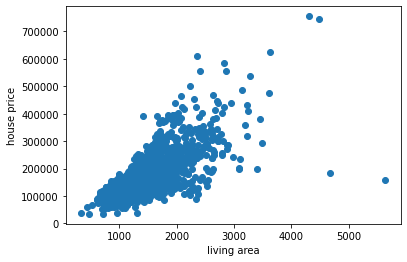

In [111]:
living_area = data.head(1460)['GrLivArea']
plt.scatter(living_area,house_price)
plt.xlabel('living area')
plt.ylabel('house price')

Text(0, 0.5, 'house price')

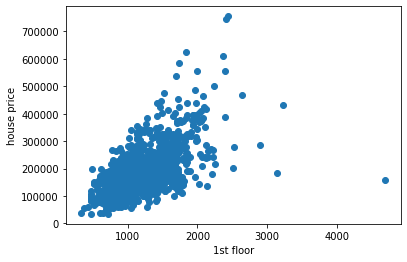

In [112]:
firstFloor = data.head(1460)['1stFlrSF']
plt.scatter(firstFloor,house_price)
plt.xlabel('1st floor')
plt.ylabel('house price')

Text(0, 0.5, 'house price')

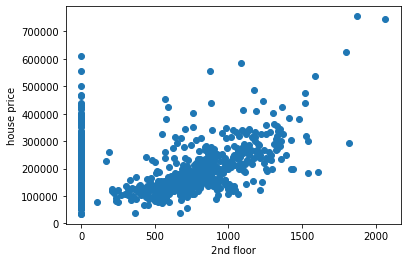

In [113]:
secondFloor = data.head(1460)['2ndFlrSF']
plt.scatter(secondFloor,house_price)
plt.xlabel('2nd floor')
plt.ylabel('house price')

#### As expected, due to a lot of houses having no second floor, the linear relation is not strong, so we will not use separate floor area 

In [114]:
data = data.drop(columns=['1stFlrSF','2ndFlrSF'])

In [115]:
sample_num, variable_num = data.shape[0],data.shape[1]
print("After removing '1stFlrSF' and '2ndFlrSF', there are {} samples and {} variables".format(sample_num, variable_num))

After removing '1stFlrSF' and '2ndFlrSF', there are 2919 samples and 62 variables


## YearBuilt and YearRemodAdd

#### Instead of using 'YearBuilt' and 'YearRemodAdd', it is more appropriate to use 'HouseAge' and 'RecentRemod'.

In [116]:
HouseAge = []
for i in range(1,sample_num+1):
    HouseAge.append(data.loc[i]['YrSold']-data.loc[i]['YearBuilt'])
    
RecentRemod = []
for i in range(1,sample_num+1):
    if data.loc[i]['YrSold']-data.loc[i]['YearRemodAdd']<5:
        RecentRemod.append(1)
    else:
        RecentRemod.append(0)

In [117]:
data.insert(variable_num,'HouseAge',HouseAge,True)
data.insert(variable_num,'RecentRemod',RecentRemod,True)

In [118]:
data = data.drop(columns=['YearBuilt','YearRemodAdd'])

## Electrical

In [119]:
investigate_var(data,'Electrical')

There are 1 sample(s) with missing Electrical type, being 0.0342583076396026%. 
There are 188 sample(s) with Electrical type FuseA, being 6.44056183624529%. 
There are 8 sample(s) with Electrical type FuseP, being 0.2740664611168208%. 
There are 1 sample(s) with Electrical type Mix, being 0.0342583076396026%. 
There are 2671 sample(s) with Electrical type SBrkr, being 91.50393970537856%. 
There are 50 sample(s) with Electrical type FuseF, being 1.7129153819801302%. 


#### Since 90% of the typings are 'SKrbr', we will lump the other types into 'Others'.

In [120]:
Electrical = []
for i in range(1,sample_num+1):
    if data.loc[i]['Electrical']=='SBrkr':
        Electrical.append(1)
    else:
        Electrical.append(0)

In [121]:
data['Electrical']=Electrical

## GarageYrBlt

#### This variable has more than 5% missing rate, we should truncate it.

In [122]:
count = 0
for i in range(1,data.shape[0]+1):
    if math.isnan(data.loc[i]['GarageYrBlt']):
        count += 1
print("The data missing rate for 'GarageYrBlt' is {}".format(count/1461))

The data missing rate for 'GarageYrBlt' is 0.10882956878850103


In [123]:
data = data.drop(columns=['GarageYrBlt'])

## MSZoning

In [124]:
investigate_var(data,'MSZoning')

There are 4 sample(s) with missing MSZoning type, being 0.1370332305584104%. 
There are 26 sample(s) with MSZoning type RH, being 0.8907159986296678%. 
There are 2265 sample(s) with MSZoning type RL, being 77.5950668036999%. 
There are 139 sample(s) with MSZoning type FV, being 4.761904761904762%. 
There are 25 sample(s) with MSZoning type C (all), being 0.8564576909900651%. 
There are 460 sample(s) with MSZoning type RM, being 15.758821514217198%. 


#### Merge small typings into 'Others'

In [125]:
MSZoning = []
for i in range(1,sample_num+1):
    if data.loc[i]['MSZoning']!='RL' and data.loc[i]['MSZoning']!='RM':
        MSZoning.append('Others')
    else:
        MSZoning.append(data.loc[i]['MSZoning'])

In [126]:
data['MSZoning'] = MSZoning

## LotConfig

In [127]:
investigate_var(data,'LotConfig')

There are 511 sample(s) with LotConfig type Corner, being 17.505995203836928%. 
There are 176 sample(s) with LotConfig type CulDSac, being 6.029462144570058%. 
There are 14 sample(s) with LotConfig type FR3, being 0.4796163069544364%. 
There are 85 sample(s) with LotConfig type FR2, being 2.9119561493662216%. 
There are 2133 sample(s) with LotConfig type Inside, being 73.07297019527236%. 


In [128]:
LotConfig = []
for i in range(1,sample_num+1):
    if data.loc[i]['LotConfig']!='Inside' and data.loc[i]['LotConfig']!='Corner':
        LotConfig.append('Others')
    else:
        LotConfig.append(data.loc[i]['LotConfig'])

In [129]:
data['LotConfig']=LotConfig

## MasVnrArea

#### Look at missing values for this variable

In [130]:
count = 0
for i in range(1,data.shape[0]+1):
    if math.isnan(data.loc[i]['MasVnrArea']):
        count += 1
print("The data missing rate for 'MasVnrArea' is {}".format(count/1461))

The data missing rate for 'MasVnrArea' is 0.01574264202600958


#### There is only a few that is missing. We fill missing values with zero.

In [131]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

# A Final Check on Missing Data

In [132]:
for i in range(1,2920):
    for var in set(data):
        try:
            if math.isnan(data.loc[i][var]):
                print("Sample {} predictor {} is missing.".format(i,var))
        except:
            continue

Sample 1556 predictor KitchenQual is missing.
Sample 2121 predictor Bath is missing.
Sample 2121 predictor BsmtLowQArea is missing.
Sample 2189 predictor Bath is missing.
Sample 2217 predictor Functional is missing.
Sample 2474 predictor Functional is missing.
Sample 2490 predictor SaleType is missing.


#### Lets fill missing data

In [133]:
data['Bath'] = data['Bath'].fillna(np.mean(data['Bath'])) # fill missing Bath with average number of bath
data['KitchenQual'] = data['KitchenQual'].fillna('TA') # fill missing KitchenQual with average kitchen quality
data['Functional'] = data['Functional'].fillna('Typ') # fill missing Functional with typical functionality
data['SaleType'] = data['SaleType'].fillna('Oth') # fill missing SaleType with 'Oth' (Other)
data['BsmtLowQArea'] = data['BsmtLowQArea'].fillna(np.mean(data['BsmtLowQArea'])) # fill missing BsmtLowQArea by the mean

## KitchenQual

In [134]:
KitchenQual = []
for i in range(1,sample_num+1):
    if data.loc[i]['KitchenQual']=='Ex':
        KitchenQual.append(4)
    elif data.loc[i]['KitchenQual']=='Gd':
        KitchenQual.append(3)
    elif data.loc[i]['KitchenQual']=='TA':
        KitchenQual.append(2)
    elif data.loc[i]['KitchenQual']=='Fa':
        KitchenQual.append(1)
    else:
        KitchenQual.append(0)

In [135]:
data['KitchenQual'] = KitchenQual

# Make dummies for categorical variables

In [136]:
# get all categorical variables
categorical_var=[]
for var in data:
    try:
        float(data.loc[1][var])
    except:
        categorical_var.append(var)
    

In [137]:
data = pd.get_dummies(data,columns=categorical_var)

In [138]:
data.to_csv('E:/projects/housing_price/data/cleaned_data.csv',header=True)